#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Cleaning 

### Data understanding & Data Types 

In [2]:
# read the application data csv and print top 5 rows
application_data_df=pd.read_csv(r"application_data.csv")
application_data_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#print info of the application data
application_data_df.info()
# from below output we can see that there are 122 columns andthree data types present all
#together and we have to further explore this to convert or change types and fix the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
#print the shape -> to get number of rows and columns
application_data_df.shape #this dataframe has 307511 rows and 122 columns
print('Number of rows in application_data_df ',application_data_df.shape[0])
print('Number of rows in application_data_df ',application_data_df.shape[1])

Number of rows in application_data_df  307511
Number of rows in application_data_df  122


#### Data Cleaning

### Identify and remove columns that have significant null values

Number of columns with >= 35% null values that need to be dropped are  49


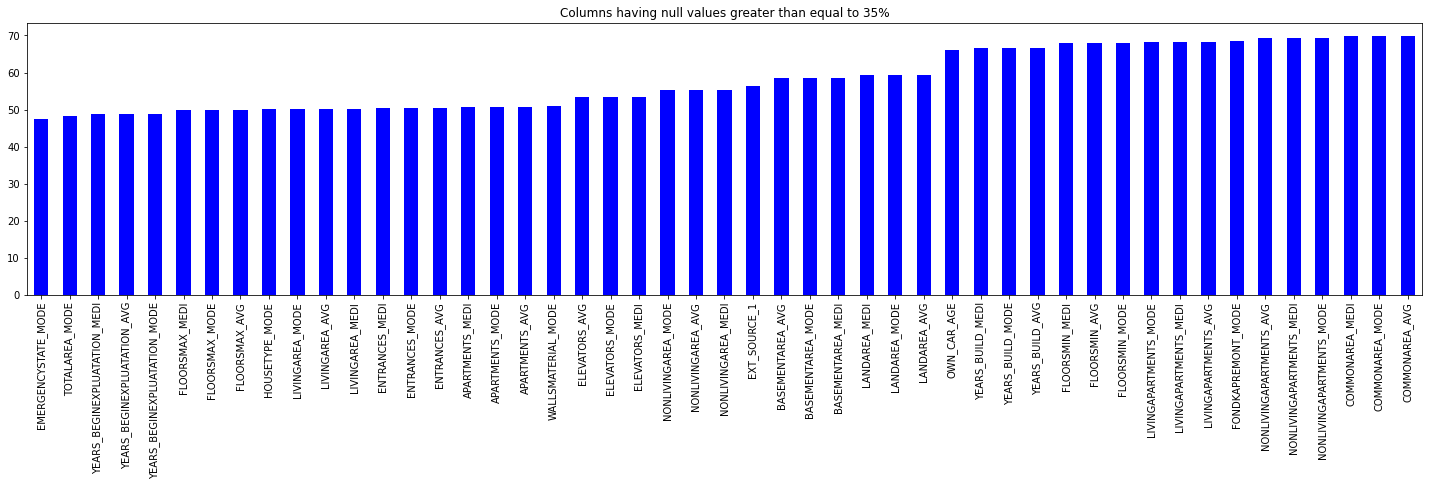

In [5]:
#let us drop columns with more null values before analyzing and fixing other important columns 
# as columns with more null values won't help in analysis

columns_null_values_pct = application_data_df.isnull().mean() * 100 
columns_gte_40_pct_null_values = columns_null_values_pct[columns_null_values_pct.values >= 35]
print('Number of columns with >= 35% null values that need to be dropped are ', len(columns_gte_40_pct_null_values))
#print('')
plt.figure(figsize=(25,5))
columns_gte_40_pct_null_values.sort_values().plot(kind='bar', color='blue')
plt.title('Columns having null values greater than equal to 35%')
plt.show()

In [6]:
# lets go ahead and drop the above columns
application_data_df.drop(columns_gte_40_pct_null_values.index, inplace=True, axis=1)

In [7]:
application_data_df.shape 
#Note that we initially had (307511, 122) columns and now we dropped 49 columns making the 
#column count 73
print('Shape of the dataframe after dropping null columns: ')
print('Number of rows in application_data_df',application_data_df.shape[0])
print('Number of rows in application_data_df ',application_data_df.shape[1])

Shape of the dataframe after dropping null columns: 
Number of rows in application_data_df 307511
Number of rows in application_data_df  73


### Handling actual columns required for analysis -> fixing data types, incorrect data/values and missing values

In [8]:
list(application_data_df)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_

In [9]:
# lets observe null values again for columns which we decided to keep for analysis

mean_pct_main_columns = application_data_df.isnull().mean()*100
mean_pct_main_columns.sort_values(ascending = False).head(25) 
# we can see that only 18 columns have null values in them. So lets go ahead and fix them

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
NAME_INCOME_TYPE               0.000000
FLAG_OWN_REALTY                0.000000
TARGET                         0.000000
FLAG_EMAIL                     0.000000
FLAG_PHONE                     0.000000
FLAG_CONT_MOBILE               0.000000
NAME_CONTRACT_TYPE             0.000000


### Fix columns that have significant null values


###### Task 1: OCCUPATION_TYPE  has  31.345545% null values so lets fix the null values for occuptaion type
###### Task 1 reason: Since OCCUPATION_TYPE is a categorical value we can use mode to fix the values
###### Task 2: Other columns which can be imputed with mode are -> AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_QRT.
###### Task 2 reason: Since these columns are number of enquiries for a certain period before the date of application we can use mode because  every bank has a particular number of times/count for enquiry before processing and here we are dealing with only one bank hence we can assume it will be uniform and use mode.
###### Task 3: NAME_TYPE_SUITE can also be imputed with mode since its categorical

In [10]:

list_of_coulumns_to_be_replaced_with_mode = []
list_of_coulumns_to_be_replaced_with_mode = [col for col in application_data_df.columns if (col.startswith('AMT_REQ_CREDIT') or col in ['OCCUPATION_TYPE','NAME_TYPE_SUITE'])]
list_of_coulumns_to_be_replaced_with_mode

['NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [11]:
# fill the above columns with mode
for column in list_of_coulumns_to_be_replaced_with_mode:
    application_data_df[column].fillna(application_data_df[column].mode()[0], inplace=True)

In [12]:
#verify that above columns are populated with mode and all null values are imputed -> we should see 0
application_data_df[list_of_coulumns_to_be_replaced_with_mode].isnull().mean()*100

NAME_TYPE_SUITE               0.0
OCCUPATION_TYPE               0.0
AMT_REQ_CREDIT_BUREAU_HOUR    0.0
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
dtype: float64

#### Imputing numerical columns

##### Imputing EXT_SOURCE columns

##### Frst lets create a common box plot function that takes any number of rows and columns and other
##### customizable fields so that it will be easy for us to do analysis without repetitive code
##### and decided on right method -> mean/median/mode to impute the values with.

In [13]:
sns.set_style('darkgrid')
def getBoxPlots(ncols, nrows, data, columns, titles, rotation):
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows)
    if(ncols == 1 and nrows == 1):
       boxPlot = sns.boxplot(data=application_data_df[columns[0]])
       boxPlot.set_title(titles[0],weight='bold', y = -0.2, rotation = rotation)

    else:
        for i in range(nrows):
            for j in range(ncols):
                boxPlot = sns.boxplot(data=application_data_df[columns[i+j]],ax = ax[j])
                if len(titles) > 0:
                    boxPlot.set_title(titles[i+j],weight='bold', y = -0.2, rotation = rotation)
        
    
    fig.tight_layout()
    plt.show()
    
    
    
    

#lets impute EXT_SOURCE_2 and EXT_SOURCE_3
#fig, ax = plt.subplots(ncols=2, nrows=1)
#extSource1BoxPlot = sns.boxplot(data=application_data_df['EXT_SOURCE_2'],ax = ax[0])
#extSource1BoxPlot.set_title(" EXT_SOURCE_2 distribution ",weight='bold')
#extSource2BoxPlot = sns.boxplot(data=application_data_df['EXT_SOURCE_3'],ax = ax[1])
#extSource2BoxPlot.set_title(" EXT_SOURCE_3 distribution ",weight='bold')
#fig.tight_layout()
#plt.show()

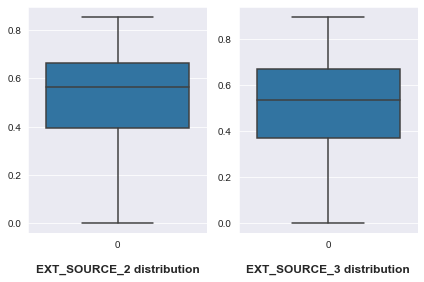

In [14]:
# get box plots for EXT_SOURCE_2 and EXT_SOURCE_3 and find if there are any outiers
getBoxPlots(2,1,application_data_df,['EXT_SOURCE_2','EXT_SOURCE_3'],['EXT_SOURCE_2 distribution','EXT_SOURCE_3 distribution'], rotation=0)

In [15]:
# since there are no outliers, we can use mean to impute the missing values
for column in ['EXT_SOURCE_2','EXT_SOURCE_3']:
    application_data_df[column].fillna(application_data_df[column].mean(), inplace=True)

In [16]:
# verify imputation is done properly -> we should see below values as 0.0
application_data_df[['EXT_SOURCE_2','EXT_SOURCE_3']].isnull().mean()*100

EXT_SOURCE_2    0.0
EXT_SOURCE_3    0.0
dtype: float64

###### Imputing AMT_GOODS_PRICE,AMT_ANNUITY  columns

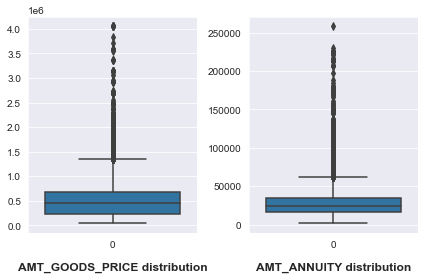

In [17]:
# get box plots for AMT_GOODS_PRICE and AMT_ANNUITY  and find if there are any outiers
getBoxPlots(2,1,application_data_df,['AMT_GOODS_PRICE','AMT_ANNUITY'],['AMT_GOODS_PRICE distribution','AMT_ANNUITY distribution'], rotation=0)

In [18]:
# since there are  outliers as seen in above graph, we can use median to impute the missing values
for column in ['AMT_GOODS_PRICE','AMT_ANNUITY']:
    application_data_df[column].fillna(application_data_df[column].median(), inplace=True)

In [19]:
# verify imputation is done properly -> we should see below values as 0.0
application_data_df[['AMT_GOODS_PRICE','AMT_ANNUITY']].isnull().mean()*100

AMT_GOODS_PRICE    0.0
AMT_ANNUITY        0.0
dtype: float64

######  Imputing SOCIAL CIRCLE values 

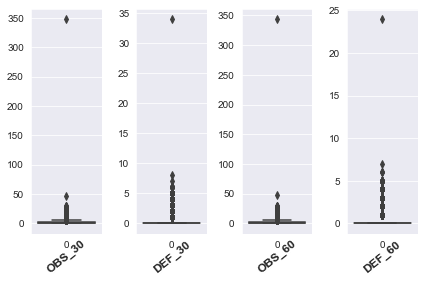

In [20]:
# get box plots for SOCIAL CIRCLE values and find if there are any outiers
getBoxPlots(4,1,application_data_df,['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'],
            ['OBS_30','DEF_30','OBS_60','DEF_60'], rotation=39)

In [21]:
# since there are  outliers as seen in above graph, we can use median to impute the missing values
for column in ['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']:
    application_data_df[column].fillna(application_data_df[column].median(), inplace=True)

In [22]:
# verify imputation is done properly -> we should see below values as 0.0
application_data_df[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].isnull().mean()*100

OBS_30_CNT_SOCIAL_CIRCLE    0.0
DEF_30_CNT_SOCIAL_CIRCLE    0.0
OBS_60_CNT_SOCIAL_CIRCLE    0.0
DEF_60_CNT_SOCIAL_CIRCLE    0.0
dtype: float64

###### Imputing CNT_FAM_MEMBERS values

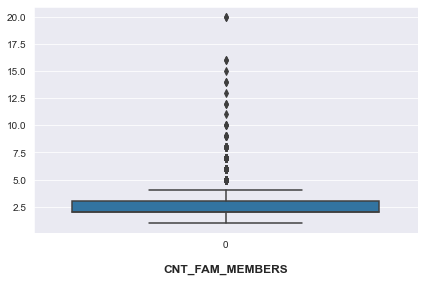

In [23]:
getBoxPlots(1,1,application_data_df,['CNT_FAM_MEMBERS'],
            ['CNT_FAM_MEMBERS'], rotation=0)

In [24]:
# since there are  outliers as seen in above graph, we can use median to impute the missing values
application_data_df['CNT_FAM_MEMBERS'].fillna(application_data_df[column].median(), inplace=True)
# verify imputation is done properly -> we should see below value as 0.0
application_data_df[['CNT_FAM_MEMBERS']].isnull().mean()*100

CNT_FAM_MEMBERS    0.0
dtype: float64

######  Imputing CODE GENDER values  -> check for NA values and  handle this to properly analyze our data as it one of the main columns

In [25]:
application_data_df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [26]:
# from the above it is clear its  a categorical value and we need to 
# impute XNA value via mode
application_data_df['CODE_GENDER'].replace({"XNA": "F"}, inplace=True)
# verify it is imputed properly. we should not see XNA in value counts
print('XNA is not present in CODE_GENDER column after imputationv --> ','XNA' not in application_data_df.CODE_GENDER.value_counts().index.tolist() )

XNA is not present in CODE_GENDER column after imputationv -->  True


#### Check which other columns have NA or XNA in them to impute them accordingly

In [27]:
print(application_data_df.FLAG_OWN_CAR.value_counts()) #Nothing to correct here
print('===============================================================')
print(application_data_df.FLAG_OWN_REALTY.value_counts()) #Nothing to correct here
print('===============================================================')
print(application_data_df.NAME_TYPE_SUITE.value_counts()) #Nothing to correct here
print('===============================================================')
print(application_data_df.NAME_INCOME_TYPE.value_counts()) #Nothing to correct here
print('===============================================================')
print(application_data_df.NAME_EDUCATION_TYPE.value_counts()) #Nothing to correct here
print('===============================================================')
print(application_data_df.NAME_FAMILY_STATUS.value_counts()) #Nothing to correct here
print('===============================================================')
print(application_data_df.NAME_HOUSING_TYPE.value_counts()) #Nothing to correct here
print('===============================================================')
print(application_data_df.NAME_CONTRACT_TYPE.value_counts()) #Nothing to correct here
print('===============================================================')
print(application_data_df.OCCUPATION_TYPE.value_counts()) #Nothing to correct here
print('===============================================================')
print(application_data_df.REGION_RATING_CLIENT.value_counts()) #Nothing to correct here
print('===============================================================')
print(application_data_df.ORGANIZATION_TYPE.value_counts()) #has some NA values

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow           

In [28]:
#since significant percent specified XNA  and also as we have seen maximum workforce
# occupation type is labourers lets treat XNA as missing values itself

application_data_df["ORGANIZATION_TYPE"].replace({"XNA": np.NaN}, inplace=True)
print('XNA is not present in ORGANIZATION_TYPE column after imputation --> ','XNA' not in application_data_df.ORGANIZATION_TYPE.value_counts().index.tolist() )

XNA is not present in ORGANIZATION_TYPE column after imputation -->  True


#### Lets drop columns not needed for analysis from dataframe

In [29]:
application_data_df['EXT_SOURCE'] = application_data_df['EXT_SOURCE_2']+application_data_df['EXT_SOURCE_3']

In [30]:
application_data_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [31]:
columns_to_be_dropped = ['REGION_POPULATION_RELATIVE','DAYS_REGISTRATION','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','OWN_CAR_AGE','HOUR_APPR_PROCESS_START'
                        ,'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY'
                         ,'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2','EXT_SOURCE_3']
FLAGGED_COLUMNS = [col for col in application_data_df.columns if ((col.startswith('FLAG_') or col in columns_to_be_dropped) and (col not in ['FLAG_OWN_CAR','FLAG_OWN_REALTY']))]      
application_data_df.drop(FLAGGED_COLUMNS, inplace=True, axis=1)
application_data_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'EXT_SOURCE'],
      dtype='object')

#### Convert DAYS_BIRTH and DAYS_EMPLOYED to years and add them as new columns

######  Analyze DAYS_BIRTH and DAYS_EMPLOYED before converting them to years and check for any corrections

In [32]:
days_col = [col for col in application_data_df if col.startswith('DAYS_')]
application_data_df[days_col].describe()

,DAYS_BIRTH,DAYS_EMPLOYED
count,307511.000000,307511.000000
mean,-16036.995067,63815.045904
std,4363.988632,141275.766519
min,-25229.000000,-17912.000000
25%,-19682.000000,-2760.000000
50%,-15750.000000,-1213.000000
75%,-12413.000000,-289.000000
max,-7489.000000,365243.000000


In [33]:
# from above clearly these columns need correction as DAYS_BIRTH and DAYS_EMPLOYED cannot be negative
# So lets make the values of these columns positive
application_data_df[days_col] = abs(application_data_df[days_col])

#verify all values are positive
application_data_df[days_col].describe()

,DAYS_BIRTH,DAYS_EMPLOYED
count,307511.000000,307511.000000
mean,16036.995067,67724.742149
std,4363.988632,139443.751806
min,7489.000000,0.000000
25%,12413.000000,933.000000
50%,15750.000000,2219.000000
75%,19682.000000,5707.000000
max,25229.000000,365243.000000


###### Convert age and work experience in days to years and rename columns appropriately

In [34]:
application_data_df['DAYS_BIRTH']= (application_data_df['DAYS_BIRTH']/365).astype(int)
application_data_df['DAYS_EMPLOYED']= (application_data_df['DAYS_EMPLOYED']/365).astype(int)
application_data_df.rename(columns = {'DAYS_BIRTH':'AGE_IN_YEARS', 'DAYS_EMPLOYED':'WORK_EXPERIENCE'}, inplace = True)

###### Lets bin age of the client , work experience in years, income amount of the client

In [35]:
age_category_labels = ['Very_Young','Young', 'Middle_Age', 'Senior_Citizen']
application_data_df['AGE_GROUP_Category'] = pd.qcut(application_data_df['AGE_IN_YEARS'],q=[0,.3,.6, 0.9, 1],
                              labels=age_category_labels)
work_category_labels = ['level_0','level_1', 'level_2', 'level_3', 'level_4']
application_data_df['WORK_YEARS_Category'] = pd.qcut(application_data_df['WORK_EXPERIENCE'],q=[0, .2, .4, .6, .8, 1],
                              labels=work_category_labels)
income_category_leves = ['Very_Low','Low', 'Medium', 'High','Very High']
application_data_df['INCOME_GROUP'] = pd.qcut(application_data_df['AMT_INCOME_TOTAL'],q=[0, .2, .4, .6, .8, 1],
                              labels=income_category_leves)

######  Change datatype of columns as appropriate

In [36]:
int_columns = ['CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
              'DEF_60_CNT_SOCIAL_CIRCLE']
application_data_df.loc[:,int_columns]=application_data_df.loc[:,int_columns].apply(lambda col: col.astype('int64'))

###### Lets create a new column called sum_members which will be sum of CNT_CHILDREN and CNT_FAM_MEMBERS 
###### Assumption made: if FAM_MEMBERS has children count then adding children count should not affect the analysis. In the cases where either of the columns are not correctly filled, a sum of two columns surely helps in better accurate analysis
###### Finally bin the new column

In [37]:
application_data_df['sum_members'] = application_data_df['CNT_CHILDREN'] + application_data_df['CNT_FAM_MEMBERS']
family_count_category_labels = ['Very_Small','Small', 'Medium', 'Large', 'Very_Large']
application_data_df['Family_GROUP'] = pd.qcut(application_data_df['AMT_INCOME_TOTAL'],q=[0, .2, .4, .6, .8, 1],
                              labels=income_category_leves)

######  Get a percentage of  clients social circle who defaulted in last 30 days and 60 days respectively

In [38]:
application_data_df['SOCIAL_CIRCLE_30_DAYS_DEF_PERCENTAGE'] = (application_data_df['DEF_30_CNT_SOCIAL_CIRCLE']/application_data_df['OBS_30_CNT_SOCIAL_CIRCLE'])*100
application_data_df['SOCIAL_CIRCLE_60_DAYS_DEF_PERCENTAGE'] = (application_data_df['DEF_60_CNT_SOCIAL_CIRCLE']/application_data_df['OBS_60_CNT_SOCIAL_CIRCLE'])*100


##  Univariate Analysis

###### Finding outliers in most important columns ->  

###### AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,

###### AGE_IN_YEARS,WORK_EXPERIENCE,

###### CNT_FAM_MEMBERS,CNT_CHILDREN,

###### AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,

###### AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,

###### AMT_REQ_CREDIT_BUREAU_YEAR

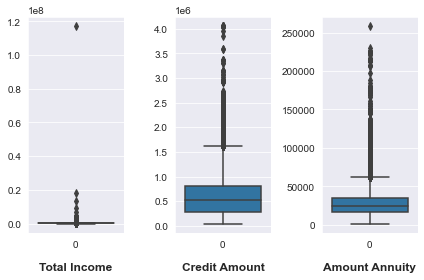

In [39]:
#lets analyse outliers for AMT_INCOME_TOTAL and AMT_CREDIT
getBoxPlots(3,1,application_data_df,['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY'],['Total Income', 'Credit Amount','Amount Annuity'],rotation = 0)


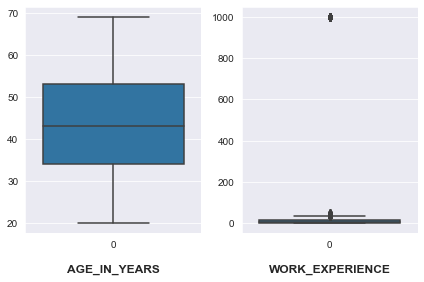

In [40]:
#lets analyse outliers for AGE_IN_YEARS and WORK_EXPERIENCE
getBoxPlots(2,1,application_data_df,['AGE_IN_YEARS','WORK_EXPERIENCE'],['AGE_IN_YEARS', 'WORK_EXPERIENCE'],rotation = 0)


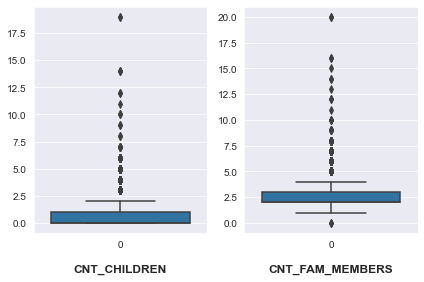

In [41]:
#lets analyse outliers for CNT_CHILDREN and CNT_FAM_MEMBERS
getBoxPlots(2,1,application_data_df,['CNT_CHILDREN','CNT_FAM_MEMBERS'],['CNT_CHILDREN', 'CNT_FAM_MEMBERS'],rotation = 0)


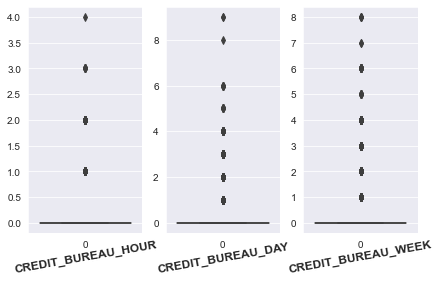

In [42]:
#lets analyse outliers for AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK
getBoxPlots(3,1,application_data_df,['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK'
                                    ,'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'],
            ['CREDIT_BUREAU_HOUR','CREDIT_BUREAU_DAY','CREDIT_BUREAU_WEEK'
                                    ,'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'],rotation = 10)



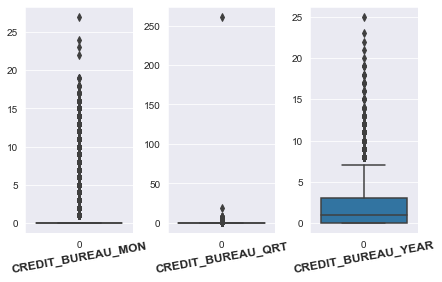

In [43]:
#lets analyse outliers for AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK
getBoxPlots(3,1,application_data_df,['AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'],
            ['CREDIT_BUREAU_MON','CREDIT_BUREAU_QRT','CREDIT_BUREAU_YEAR'],rotation = 10)


######  Lets find distribution of various categories that applied for loan
######  occupation type, organization type, income grp level, cnt_family_members 

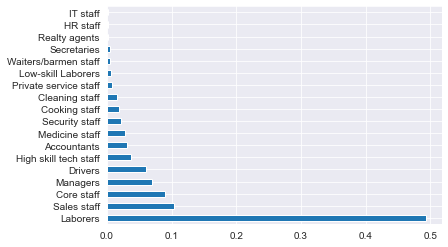

In [44]:
#occupation type
application_data_df.OCCUPATION_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

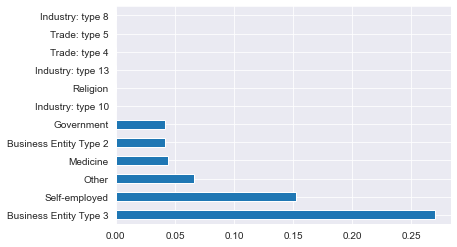

In [45]:
#organization type
top6 = application_data_df.ORGANIZATION_TYPE.value_counts(normalize=True).head(6)
bottom6 = application_data_df.ORGANIZATION_TYPE.value_counts(normalize=True).tail(6)
df = pd.concat([top6, bottom6])
df.plot.barh()
plt.show()

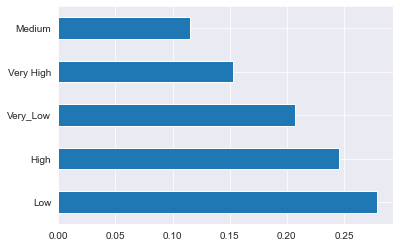

In [46]:
#income group
application_data_df.INCOME_GROUP.value_counts(normalize=True).plot.barh()
plt.show()

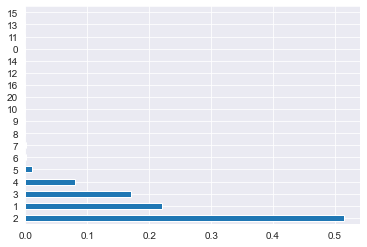

In [47]:
# number of family members
application_data_df.CNT_FAM_MEMBERS.value_counts(normalize=True).plot.barh()
plt.show()


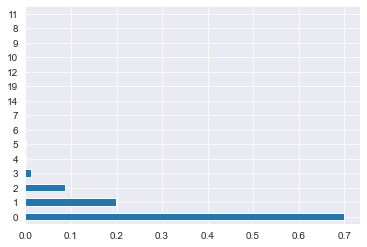

In [48]:
# number of children
application_data_df.CNT_CHILDREN.value_counts(normalize=True).plot.barh()
plt.show()


##### Checking Imbalance

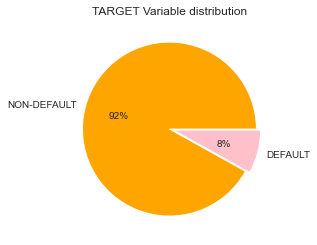

In [49]:
plt.pie(application_data_df['TARGET'].value_counts(),autopct='%1.0f%%',labels=['NON-DEFAULT','DEFAULT'], 
                                               explode=(0,0.05),colors = ['Orange','Pink'])
plt.title('TARGET Variable distribution')
plt.show()

###### Divide the dataset into two , one for those who default and other for those who dont

In [50]:
# Dividing the original dataset into two  dataframes based the target value
defaulter_df = application_data_df.loc[application_data_df.TARGET == 1]
non_defaulter_df = application_data_df.loc[application_data_df.TARGET == 0]

##### Lets perform univariate categorical analysis for target variable and compare them. We will compare on
###### 1. Gender 
###### 2. Income Group 
###### 3. Loan Type
###### 4. Family Status
###### 5. Age group 
###### 6. Work experience group
###### 7. If Client owns a car
###### 8. If client owns a house or flat
###### 9. Education Level 
###### 10. Housing Type
###### 11. Who Accompanied the client 


In [51]:
#Lets create a common function to plot pie graphs for default and non default side by side 


def getPiePlots(ncols, nrows, dataframe, column, titles, rotation):
    fig, ax = plt.subplots(1,2, figsize=(12, 5), tight_layout=True)
    colors = sns.color_palette('pastel')
    piechart1 = dataframe[0][column].value_counts()
    piechart2 = dataframe[1][column].value_counts()
    pie0 = ax[0].pie(piechart1,autopct='%1.0f%%',
             labels = piechart1.index.tolist(),colors=colors)
    ax[0].set_title(titles[0], weight='bold')
    pie1 = ax[1].pie(piechart2,autopct='%1.0f%%',
             labels = piechart2.index.tolist(),colors=colors)
    ax[1].set_title(titles[1], weight='bold')
    plt.show()
    

   



In [52]:
# function to count plot for categorical variables
def getCountPlots(columnName, titles):

    sns.set_style('whitegrid')
    sns.color_palette("tab10")
    colors = sns.color_palette('pastel')
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.countplot(x=columnName, data=defaulter_df,ax=ax1)
    ax1.set_ylabel('Total Counts')
    ax1.set_title(titles[0],weight='bold')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(defaulter_df))*100), (p.get_x()+0.1, p.get_height()+50))
        
    sns.countplot(x=columnName, data=non_defaulter_df,ax=ax2)
    ax2.set_ylabel('Total Counts')
    ax2.set_title(titles[1],weight='bold')    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(non_defaulter_df))*100), (p.get_x()+0.1, p.get_height()+50))

    ax1.tick_params(axis='both', which='major', labelsize=15)
    ax2.tick_params(axis='both', which='major', labelsize=15)
    plt.show()
    

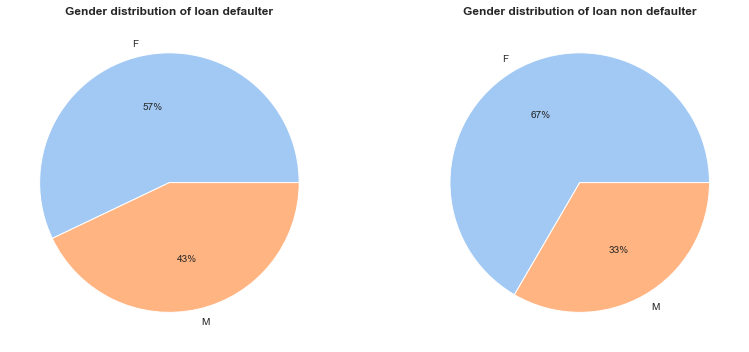

In [53]:
getPiePlots(2,1,[defaulter_df,non_defaulter_df],'CODE_GENDER',['Gender distribution of loan defaulter','Gender distribution of loan non defaulter'],rotation = 0)


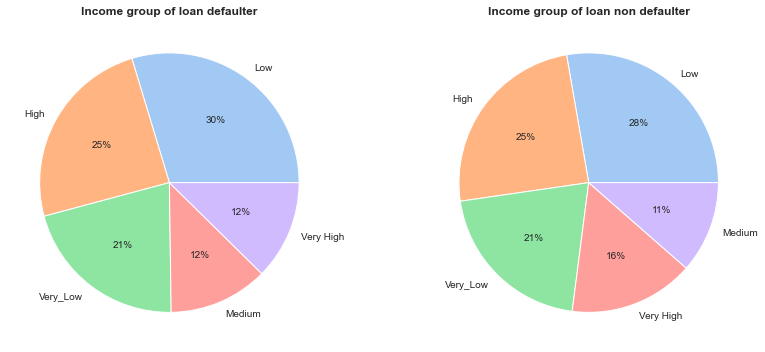

In [54]:
getPiePlots(2,1,[defaulter_df,non_defaulter_df],'INCOME_GROUP',['Income group of loan defaulter','Income group of loan non defaulter'],rotation = 0)


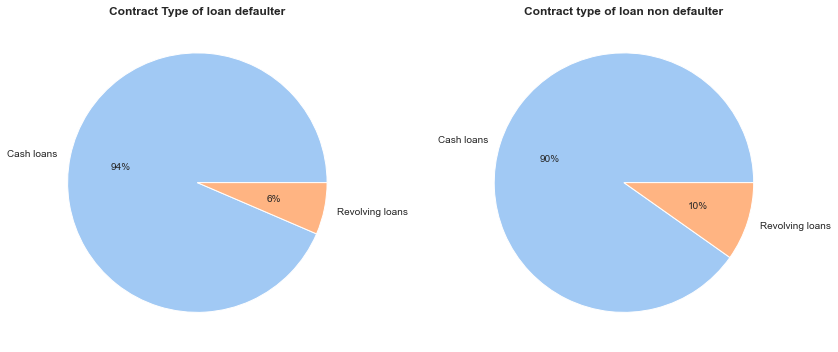

In [55]:
getPiePlots(2,1,[defaulter_df,non_defaulter_df],'NAME_CONTRACT_TYPE',['Contract Type of loan defaulter','Contract type of loan non defaulter'],rotation = 0)


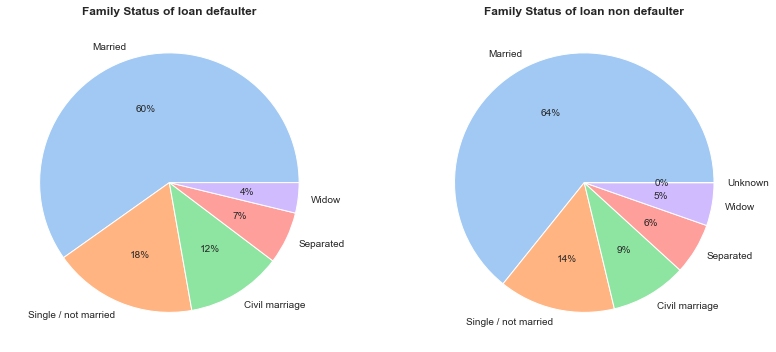

In [56]:
getPiePlots(2,1,[defaulter_df,non_defaulter_df],'NAME_FAMILY_STATUS',['Family Status of loan defaulter','Family Status of loan non defaulter'],rotation = 0)


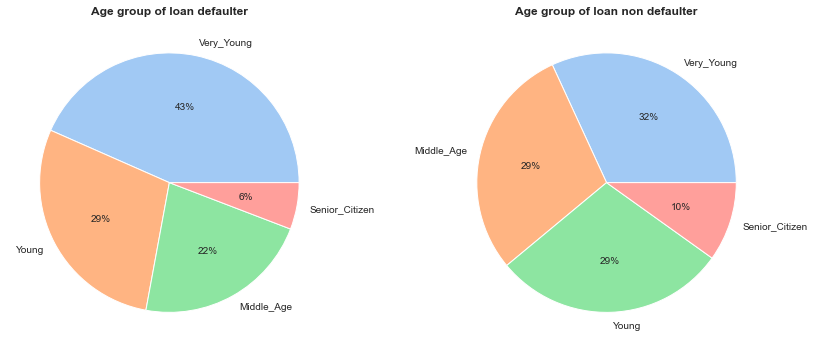

In [57]:
#AGE_GROUP_Category, WORK_YEARS_Category
getPiePlots(2,1,[defaulter_df,non_defaulter_df],'AGE_GROUP_Category',['Age group of loan defaulter','Age group of loan non defaulter'],rotation = 0)


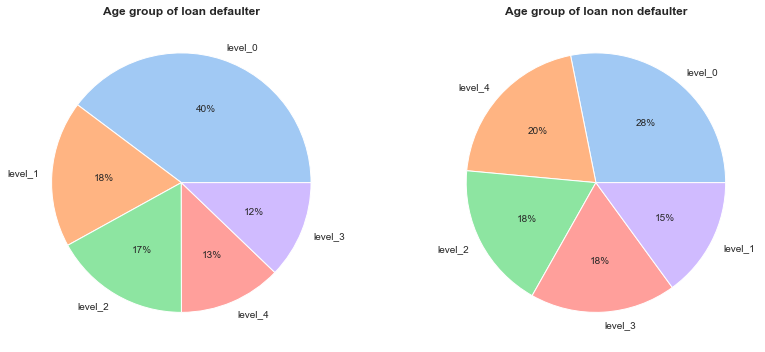

In [58]:
getPiePlots(2,1,[defaulter_df,non_defaulter_df],'WORK_YEARS_Category',['Age group of loan defaulter','Age group of loan non defaulter'],rotation = 0)


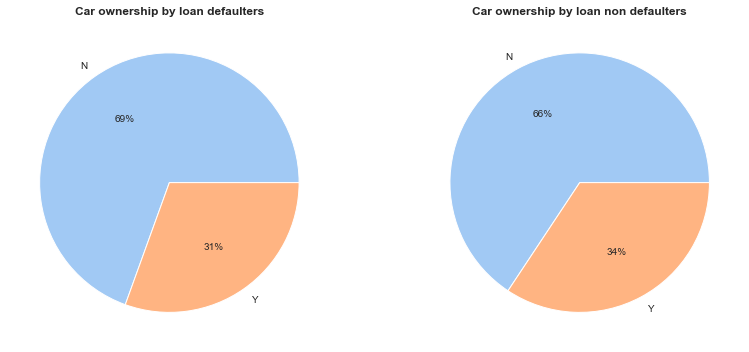

In [59]:
getPiePlots(2,1,[defaulter_df,non_defaulter_df],'FLAG_OWN_CAR',['Car ownership by loan defaulters','Car ownership by loan non defaulters'],rotation = 0)


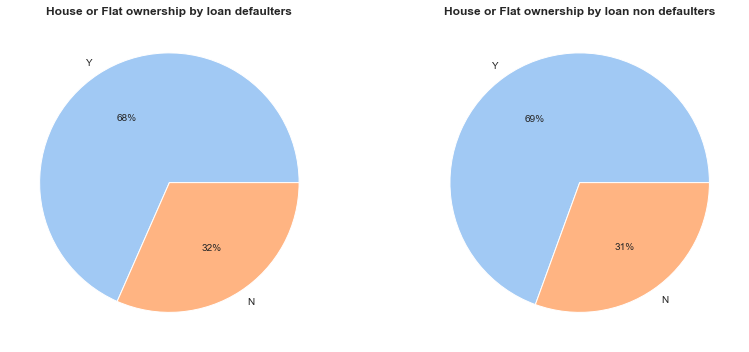

In [60]:
getPiePlots(2,1,[defaulter_df,non_defaulter_df],'FLAG_OWN_REALTY',['House or Flat ownership by loan defaulters','House or Flat ownership by loan non defaulters'],rotation = 0)


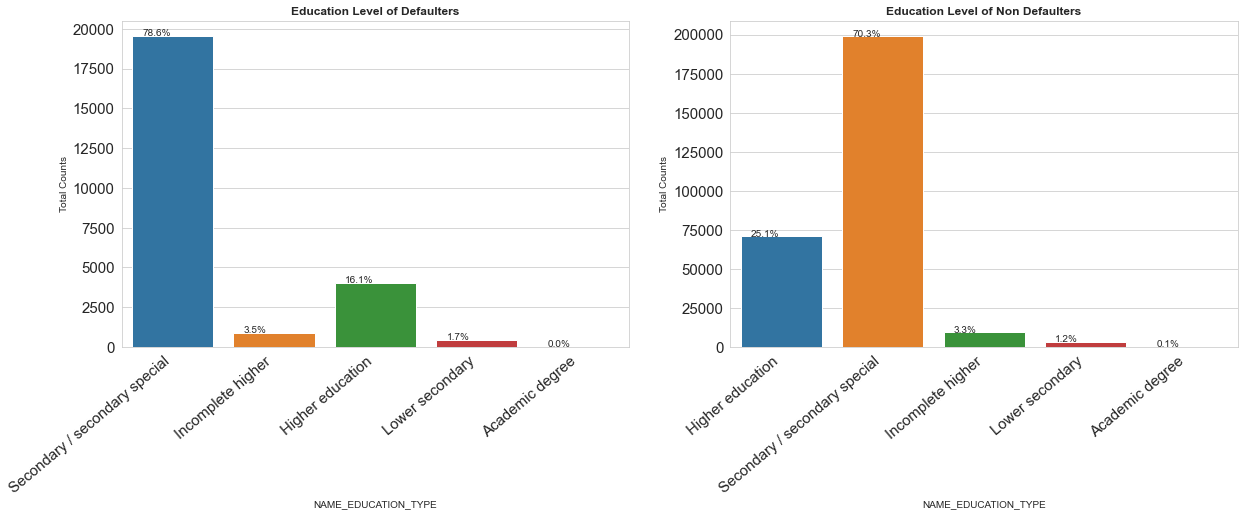

In [61]:
getCountPlots('NAME_EDUCATION_TYPE',['Education Level of Defaulters','Education Level of Non Defaulters'])

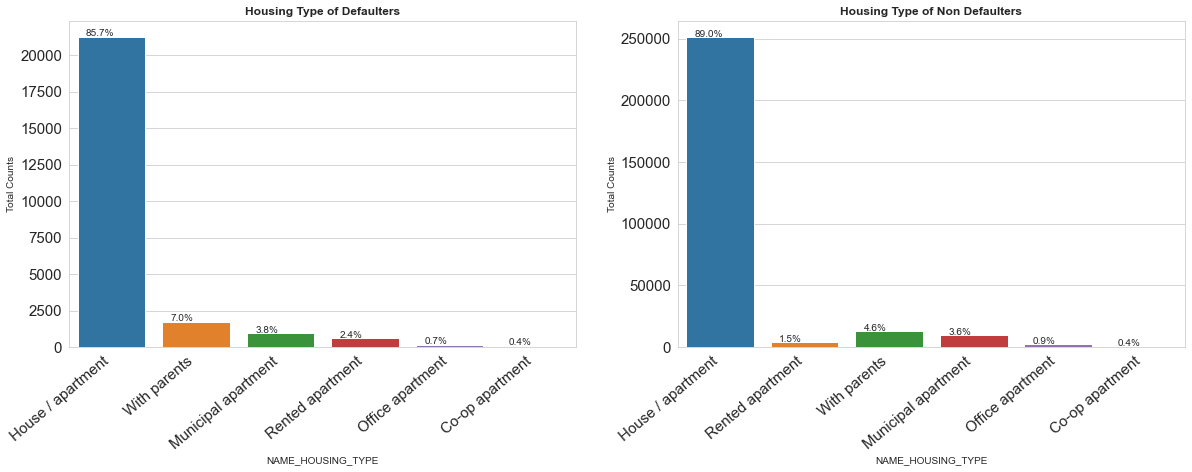

In [62]:
getCountPlots('NAME_HOUSING_TYPE',['Housing Type of Defaulters','Housing Type of Non Defaulters'])

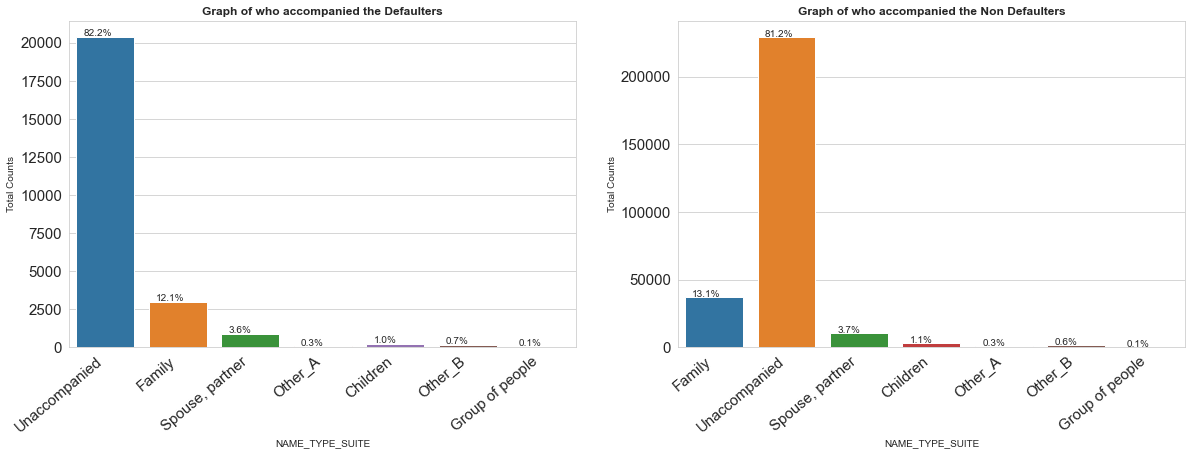

In [63]:
getCountPlots('NAME_TYPE_SUITE',['Graph of who accompanied the Defaulters','Graph of who accompanied the Non Defaulters'])

###### Univariate Analysis of Numerical Variables on the basis of 'Target' Variable. We will compare on
###### 1. AMT_ANNUITY 
###### 2. AMT_INCOME_TOTAL
###### 3. AMT_CREDIT
###### 4. AMT_GOODS_PRICE
###### 5. CNT_FAM_MEMBERS
###### 6. EXT_SOURCE = EXT_SOURCE_2+EXT_SOURCE_3


In [64]:
import matplotlib.ticker as ticker
def univariate_numerical(columName,title,xticksInMillions,yticksInMillions,yinLog,hue =None):
    fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,10))
    ax[0].set_title(f'Distribution Plot of {title} for defaulters ', weight='bold', fontsize=15)
    sns.histplot(defaulter_df[~defaulter_df[columName].isna()][columName],ax=ax[0], color="#4CB391")
    ax[0].set_ylabel(ylabel = 'count',weight='bold')
    if(xticksInMillions):
        scale_x = 1e6
        ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
        ax[0].xaxis.set_major_formatter(ticks_x)
        ax[0].set_xlabel(f'{title} val in millions', weight='bold')
        
   # plt.yscale('log')
    ax[1].set_title(f'{title} Box Plot of defaulters ', weight='bold',fontsize=15)
    sns.boxplot(data =defaulter_df, y=columName,ax=ax[1],orient='v')
    if(xticksInMillions):
        scale_x = 1e6
        ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
        ax[1].xaxis.set_major_formatter(ticks_x)
        ax[1].set_xlabel(f'{title} val in millions', weight='bold')
    if(yticksInMillions):
        scale_y = 1e6
        ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
        ax[1].yaxis.set_major_formatter(ticks_y)
        ax[1].set_ylabel(f'{title} val in millions', weight='bold')
    elif(yinLog):
        plt.yscale('log')
        
        
    
   # plt.yscale('log')
    plt.show()
    
    fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
    ax[0].set_title(f'Distribution Plot of {title} for non defaulters ', weight='bold',fontsize=15)
    sns.histplot(non_defaulter_df[~non_defaulter_df[columName].isna()][columName],ax=ax[0], color="#4CB391")
    ax[0].set_ylabel(ylabel = 'count',weight='bold')
    if(xticksInMillions):
        scale_x = 1e6
        ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
        ax[0].xaxis.set_major_formatter(ticks_x)
        ax[0].set_xlabel(f'{title} val in millions', weight='bold')
    #plt.yscale('log')
    ax[1].set_title(f' {title} Box Plot of non defaulters ',weight='bold',fontsize=15)
    sns.boxplot(data =non_defaulter_df, y=columName,ax=ax[1],orient='v')
    if(yticksInMillions):
        scale_y = 1e6
        ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
        ax[1].yaxis.set_major_formatter(ticks_y)
        ax[1].set_ylabel(f'{title} val in millions', weight='bold')
    elif(yinLog):
        plt.yscale('log')
    plt.show()

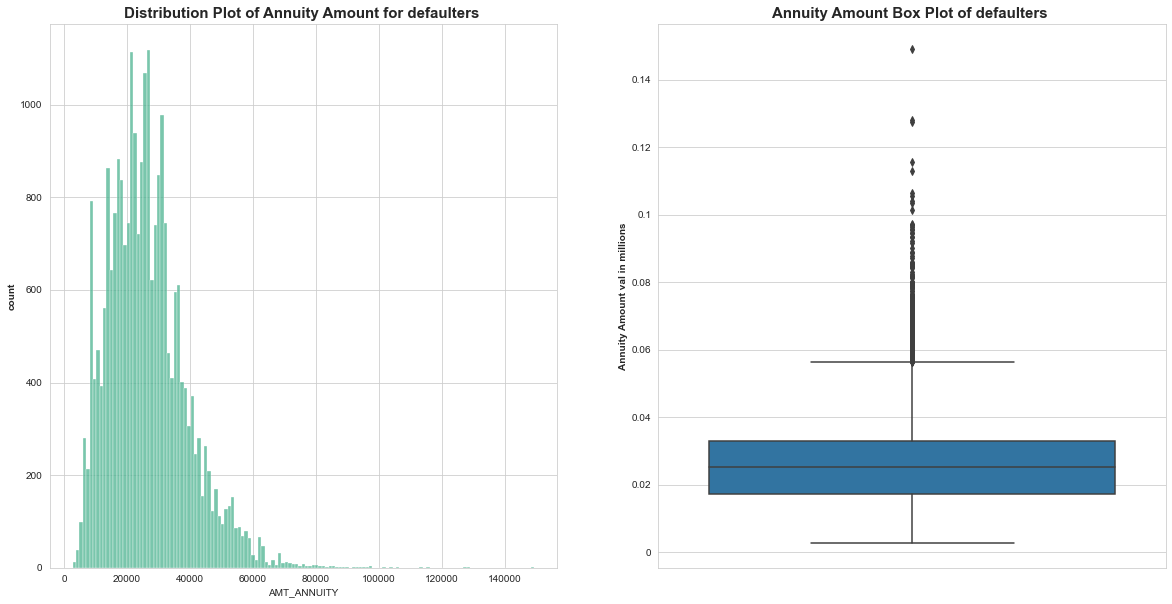

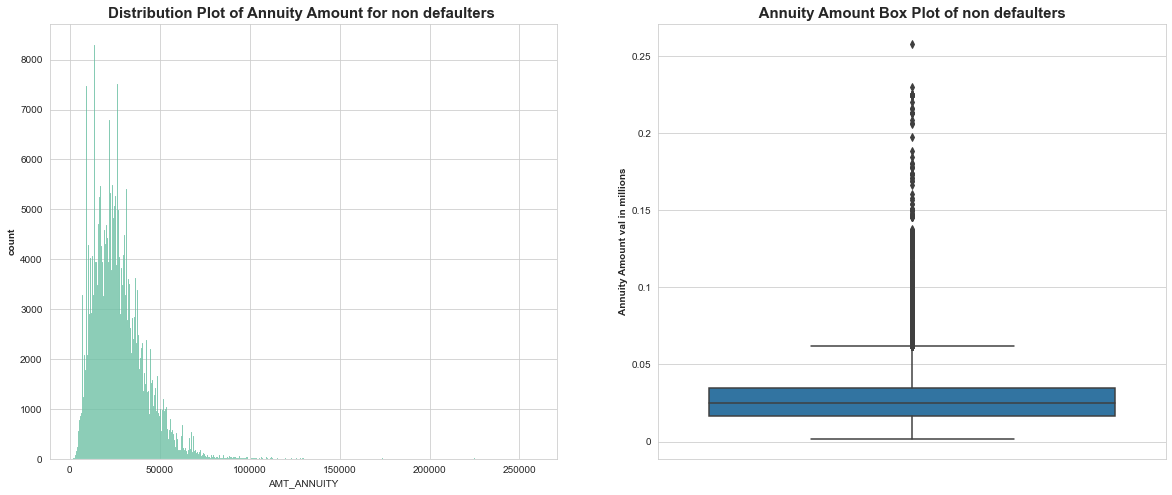

In [65]:
univariate_numerical('AMT_ANNUITY', 'Annuity Amount',False, True, False)


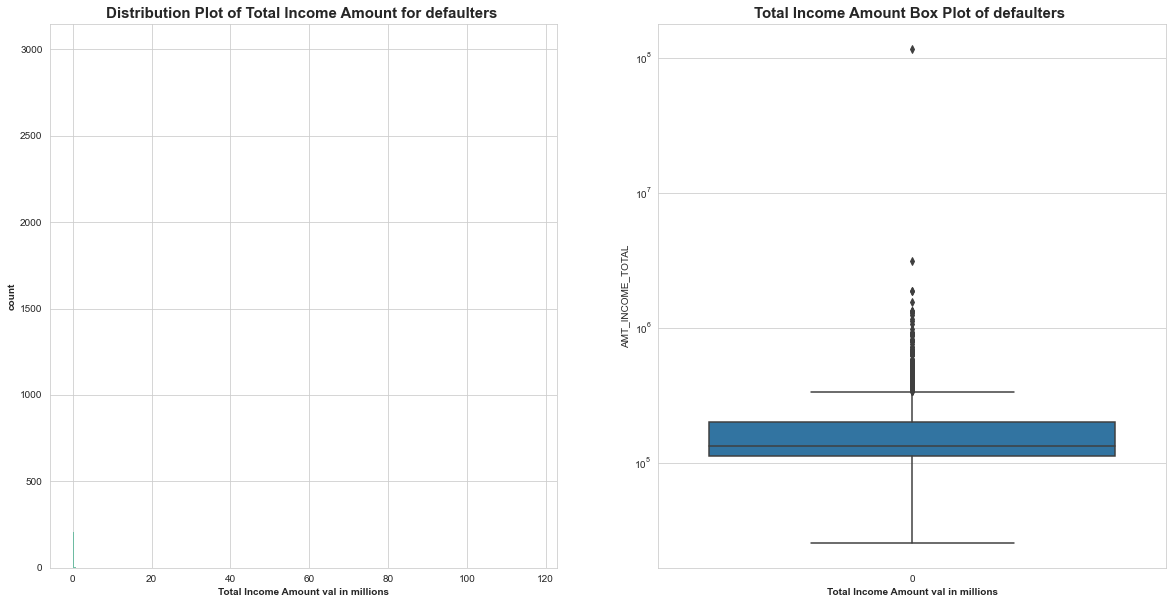

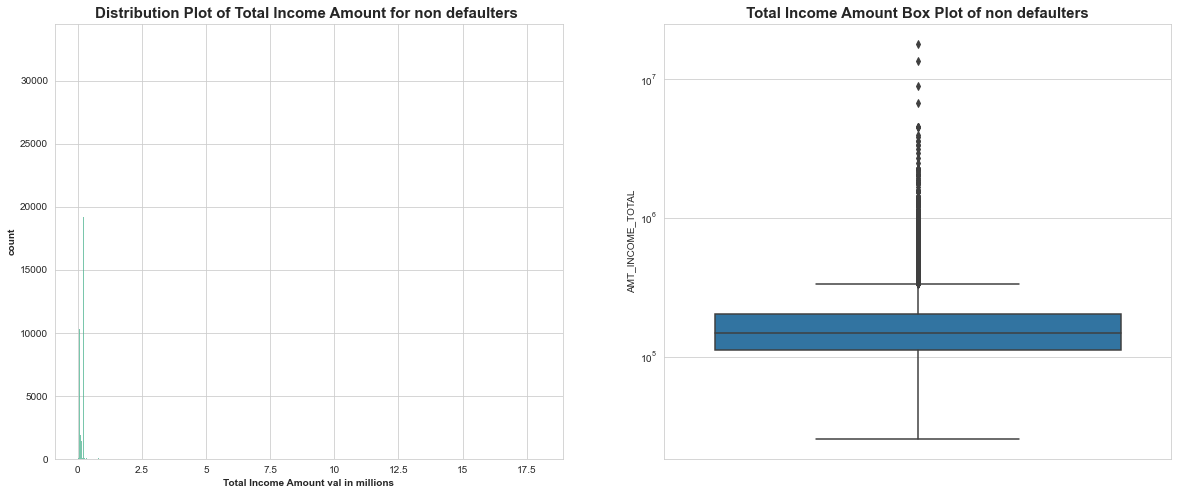

In [66]:
univariate_numerical('AMT_INCOME_TOTAL', 'Total Income Amount', True,False, True)

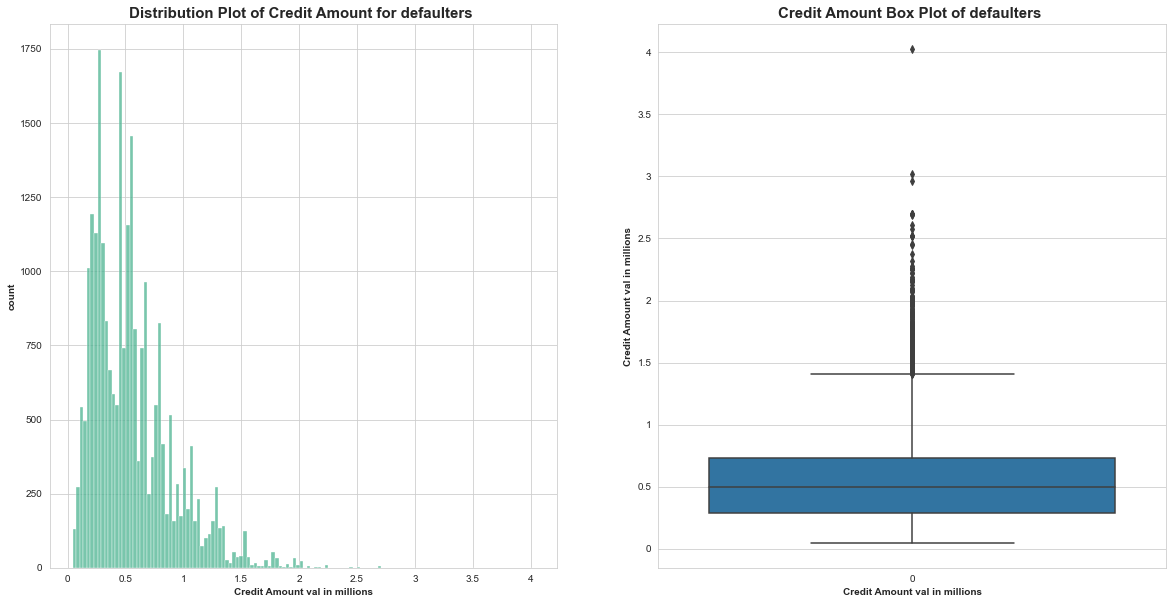

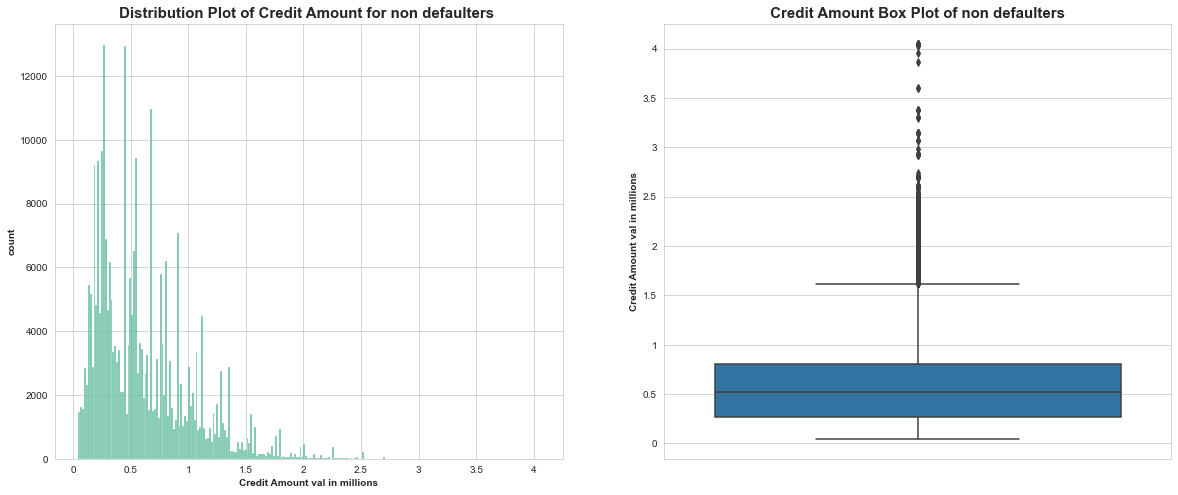

In [67]:
univariate_numerical('AMT_CREDIT', 'Credit Amount', True,True, False)

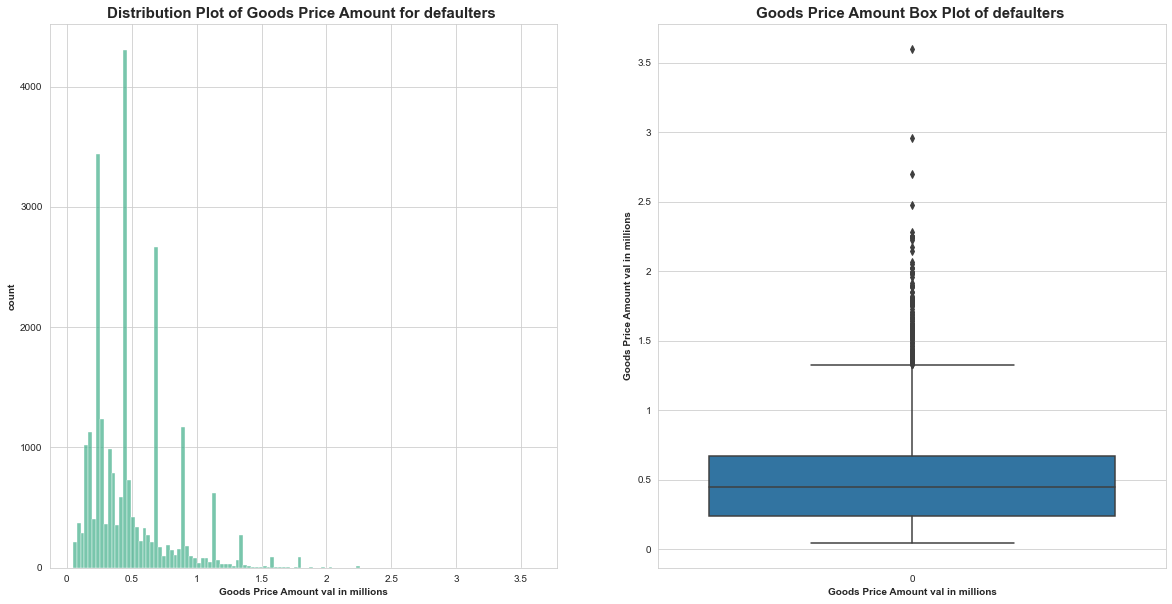

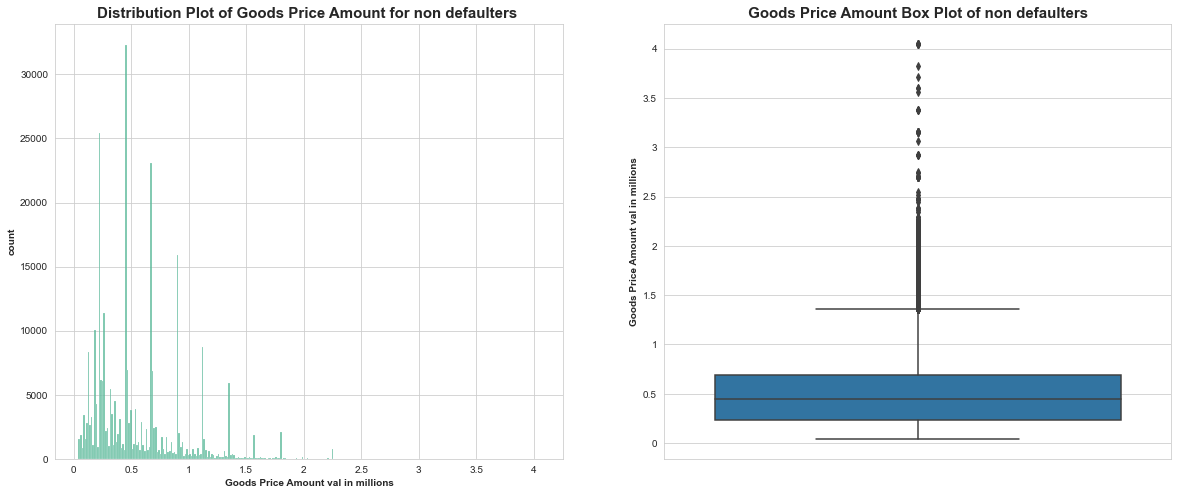

In [68]:
univariate_numerical('AMT_GOODS_PRICE', 'Goods Price Amount', True,True, False)

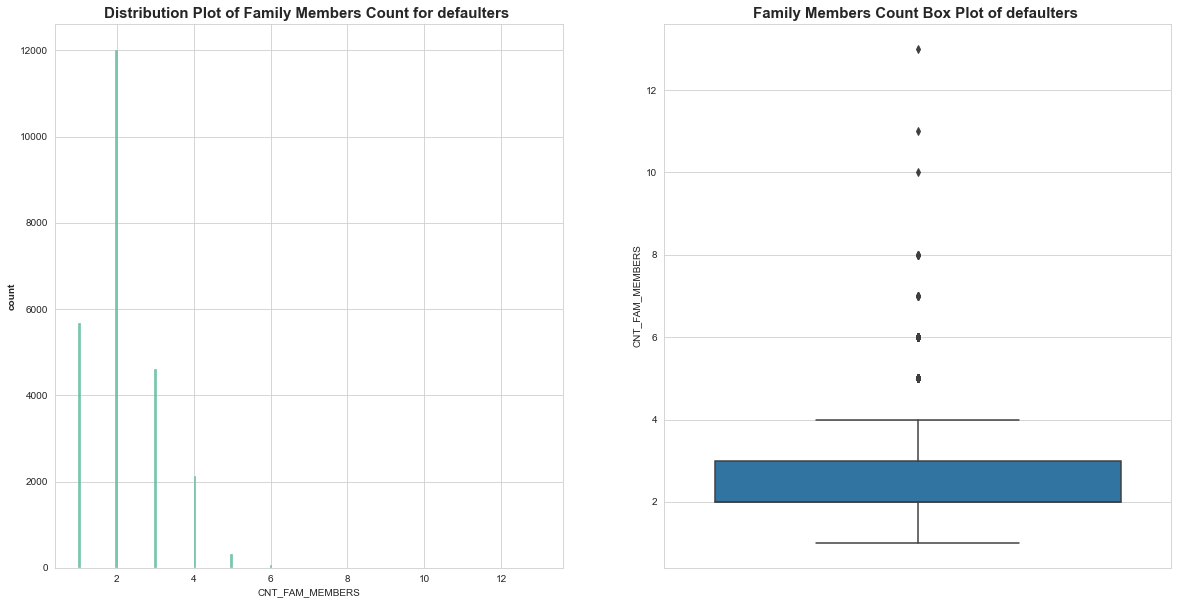

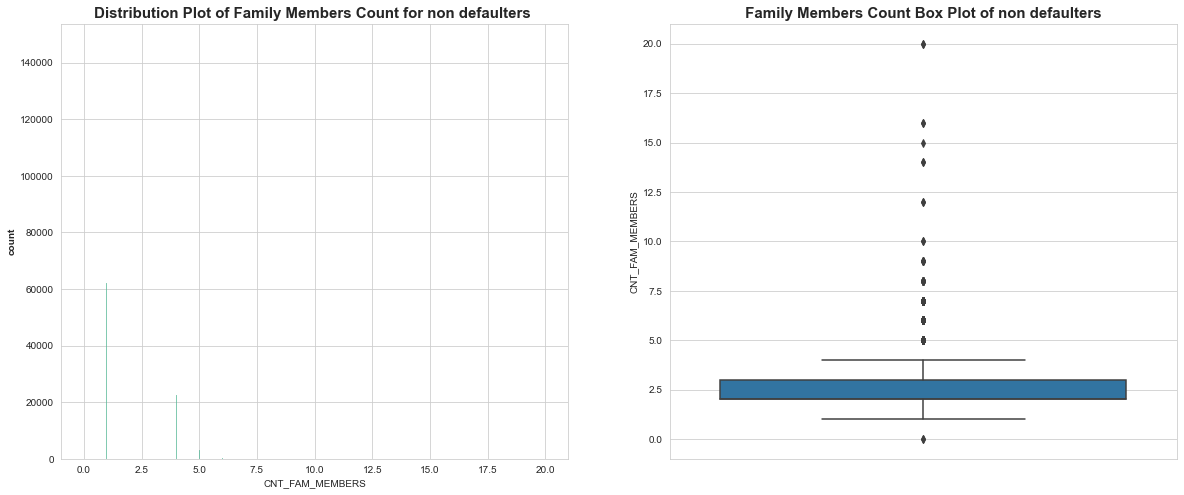

In [69]:
univariate_numerical('CNT_FAM_MEMBERS', 'Family Members Count', False,False, False)

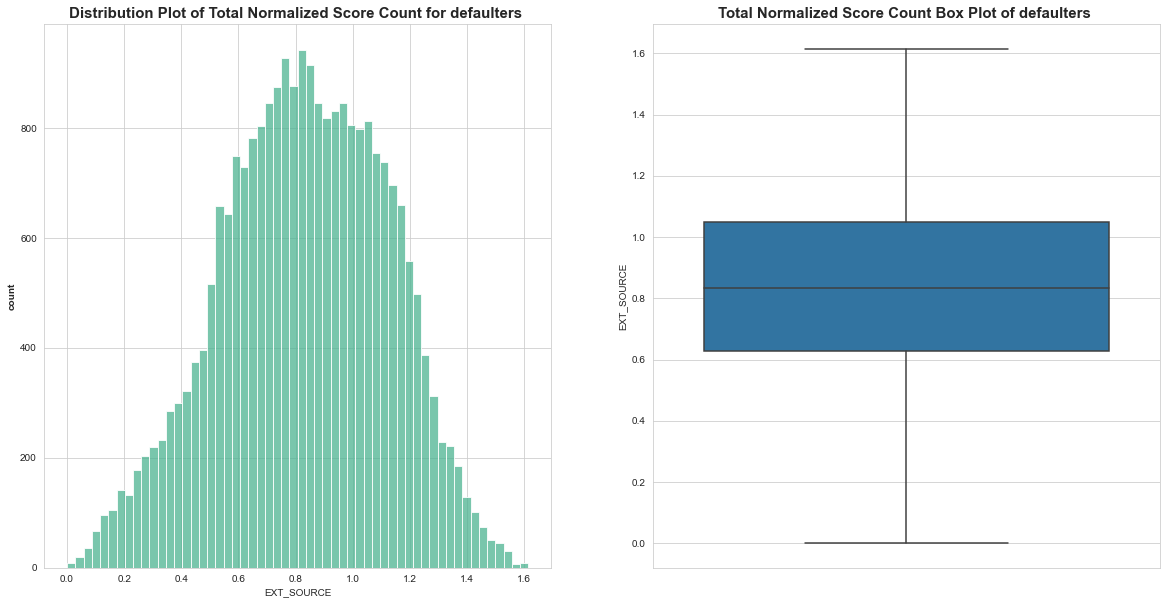

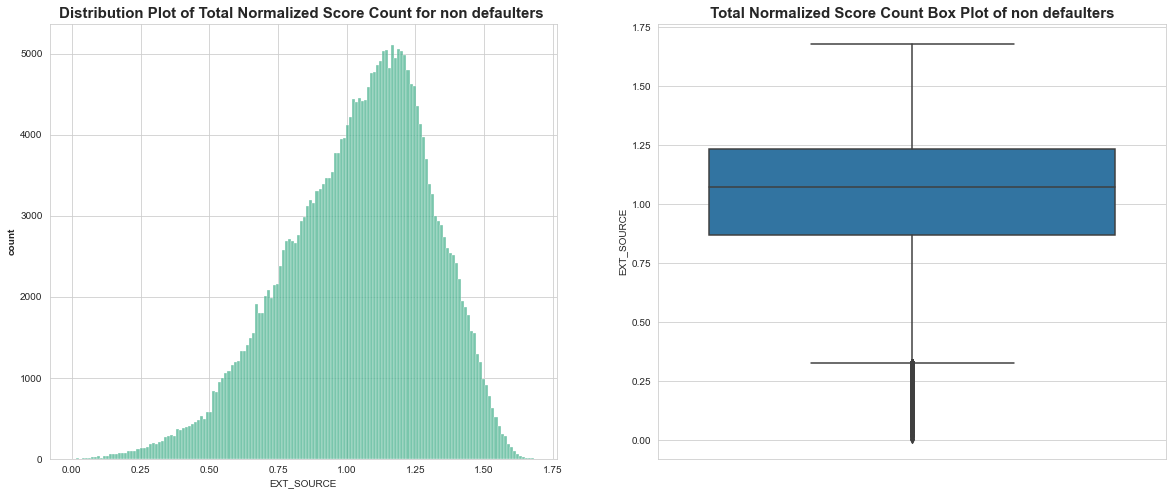

In [71]:
univariate_numerical('EXT_SOURCE', 'Total Normalized Score Count', False,False, False)

#### Bivariate Analysis 


###### Bivariate Analysis -> Categorical vs Numerical Variables
######  Education Level vs Income Amount
######  Education Level vs Amount given as Credit
######  